# Queueing theory - E2/E2/1 example

This notebook provides an example how to set up a queueing simulation. Input that needs to be specified are:
* 'Lambda': the number of arrivals per hour 
* 'Mu': the number of departures (services completed) per hour
* 'c': the number of servers in the system

To further characterise the queueing behaviour in the system the user has to specify the probability distributions that characterise the interarrival and service times. This notebook describes an E2/E2/1 queue (according to the Kendall notation for queueing systems) where both the interarrival times and the service times are assumed to be Erlang 2 distributed.  

Currently implemented distributions are:
* 'M': Exponential distribution, 
* 'E2': Erlang 2 distribution,
* 'D': Deterministic lists with known input

NB: the calculation becomes more accurate when a larger number of arrivals (nr_arr) is simulated. Obviously there is a tradeoff between accuracy and calculation time.

### 1. Imports

In [7]:
import openqtsim

### 2. Prepare inputs

In [8]:
# Basic input
Lambda = 8  # nr of arrivals per hour
Mu = 9  # nr of exits (services completed) per server per hour (divide total nr of exits by number of servers when c > 1)

#### Define the queue object input

In [9]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("E2", arr_rate=Lambda)
S = openqtsim.ServiceProcess("E2", srv_rate=Mu)
c = 1

#### Create the queue object and use it to create a simulating object

In [10]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'E2/E2/1/inf/inf/FIFO'

### 3. Run the simulation

In [11]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

nr_arr = 1_000
sim = openqtsim.Simulation(q)
sim.run(nr_arr) 

Start simulation of "E2/E2/1/inf/inf/FIFO" queue

Wall time: 348 ms


In [12]:
sim.get_stats()
print('Input IAT: {:.4f}'.format(1/Lambda))
print('Input ST: {:.4f}'.format(1/Mu))

Waiting time over service time: 2.1211

Rho_system: system utilisation: 0.8653
Rho_server: server utilisation: 0.8653
P_0: probability nobody in the system: 0.1347

L_s: average nr of customers in the system: 2.8902774306423393
L_q: average nr of customers in the queue: 1.987253186703324
W_s: the long term average time spent in the system: 0.6789
W_q: the long term average time spent in the queue: 0.4613

IAT: average inter arrival time: 0.2507
ST: average service time: 0.2175



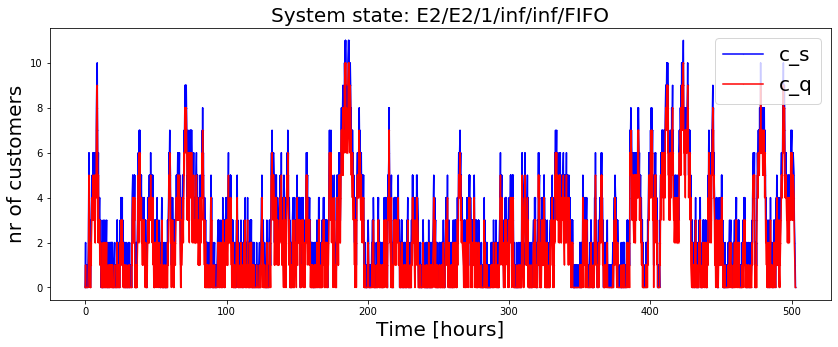

In [13]:
sim.plot_system_state()

In [14]:
df_cust, df_sys = sim.return_log()

In [15]:
df_cust.head(10)

# Meaning of the columns:
# c_id: customer id
# IAT: interarrival time 
# ST: service time 
# AT: arrival time 
# TSB: time service begins
# TSE: time service ends 
# TCSS: time customer spends in the system
# TCWQ: time customer waits int he queue
# ITS: idle time server
# s_id: id of server assigned to customer

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,s_id
0,1,0.060470,0.116709,0.060470,0.060470,0.177180,0.116709,0.000000,0.060470,1
1,2,0.104382,0.006111,0.164853,0.177180,0.183291,0.018438,0.012327,0.000000,1
2,3,0.377757,0.191969,0.542610,0.542610,0.734579,0.191969,0.000000,0.359319,1
3,4,0.393586,0.250862,0.936195,0.936195,1.187057,0.250862,0.000000,0.201617,1
4,5,0.504283,0.266336,1.440478,1.440478,1.706815,0.266336,0.000000,0.253421,1
5,6,0.436774,0.622221,1.877252,1.877252,2.499473,0.622221,0.000000,0.170438,1
6,7,0.320283,0.272519,2.197535,2.499473,2.771992,0.574457,0.301938,0.000000,1
7,8,0.064587,0.171015,2.262122,2.771992,2.943008,0.680886,0.509870,0.000000,1
8,9,0.147108,0.055318,2.409230,2.943008,2.998326,0.589096,0.533778,0.000000,1
9,10,0.075459,0.143413,2.484689,2.998326,3.141739,0.657050,0.513637,0.000000,1


In [16]:
df_sys.head(10)

# Meaning of the columns:
# t: time of logging (if 'lambda' and 'mu' are specified as values per hour, the unit of 't' is hours)
# c_s: nr of customers in the system
# c_q nr of customers in the queue

,t,c_s,c_q
0,0.000000,0,0
1,0.060470,1,0
2,0.164853,2,1
3,0.177180,1,0
4,0.183291,0,0
5,0.542610,1,0
6,0.734579,0,0
7,0.936195,1,0
8,1.187057,0,0
9,1.440478,1,0


#### Plot IAT and ST

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox